# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [59]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [60]:
#Read in the ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(3)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003


### Merge the DataFrames

In [61]:
# Combine the data into a single dataset
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [62]:
# Show info of combined df
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [63]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [64]:
# create 3 separate dataframes for each city type

#urban cities dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

#suburban dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

#rural df
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head(1)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [65]:
#  1. Get the total rides for each city type   
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.sum(), suburban_ride_count.sum(), rural_ride_count.sum()

(1625, 625, 125)

In [66]:
# this is the way I thought to do it, and double checked with the other method below
rides = pyber_data_df.groupby("type").size()
rides

type
Rural        125
Suburban     625
Urban       1625
dtype: int64

In [67]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").driver_count.sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [68]:
# Another method that I found on Slack
pyber_data_df.loc[:, ["city", "type", "driver_count"]].drop_duplicates().groupby("type").driver_count.sum()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [69]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [70]:
#  4. Get the average fare per ride for each city type. 
city_type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [74]:
# 5. Get the average fare per driver for each city type. 
driver_avg_fare = total_fare/total_drivers
driver_avg_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [82]:
#  6. Create a PyBer summary DataFrame. (Concatenation)
pyber_summary_df = pd.concat([rides, total_drivers, total_fare,
                    city_type_avg_fare, driver_avg_fare],axis=1)
pyber_summary_df

,0,driver_count,fare,fare,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [85]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,0,driver_count,fare,fare,1
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [86]:
#  8. Format the columns.
pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare/Ride", "Average Fare/Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare/Ride,Average Fare/Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [76]:
# Print the merged DataFrame for reference.
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [88]:
sum_fares_by_type =  pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [95]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date. = pyber_data_df.groupby(["date", "type"]).fare.sum()
df_new = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
df_new = pd.DataFrame(df_new)
df_new

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [182]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df_new.reset_index(inplace=True)
df_new

,index,date,type,fare
0,0,2019-01-01 00:08:16,Urban,37.91
1,1,2019-01-01 00:46:46,Suburban,47.74
2,2,2019-01-01 02:07:24,Suburban,24.07
3,3,2019-01-01 03:46:50,Urban,7.57
4,4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...,...
2370,2370,2019-05-08 04:20:00,Urban,21.99
2371,2371,2019-05-08 04:39:49,Urban,18.45
2372,2372,2019-05-08 07:29:01,Urban,18.55
2373,2373,2019-05-08 11:38:35,Urban,19.77


In [183]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', 
# and values='fare' to get the total fares for each type of city by the date. 
date_index_fare_df = df_new.pivot(index='date', columns='type', values='fare')
date_index_fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [184]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates,
#'2019-01-01':'2019-04-29'.
date_fare_loc_df = date_index_fare_df.loc["2019-01-01":"2019-04-29"]
date_fare_loc_df
# 'Wow, I didn't think it would be that simple'.

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [185]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_fare_loc_df.index = pd.to_datetime(date_fare_loc_df.index)
date_fare_loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [193]:
# 6. Check that the datatype for the index is datetime using df.info()
date_fare_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [155]:
# date range is now displayed correctly

In [195]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_fare_loc_df = date_fare_loc_df.resample('W').sum()
date_fare_loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


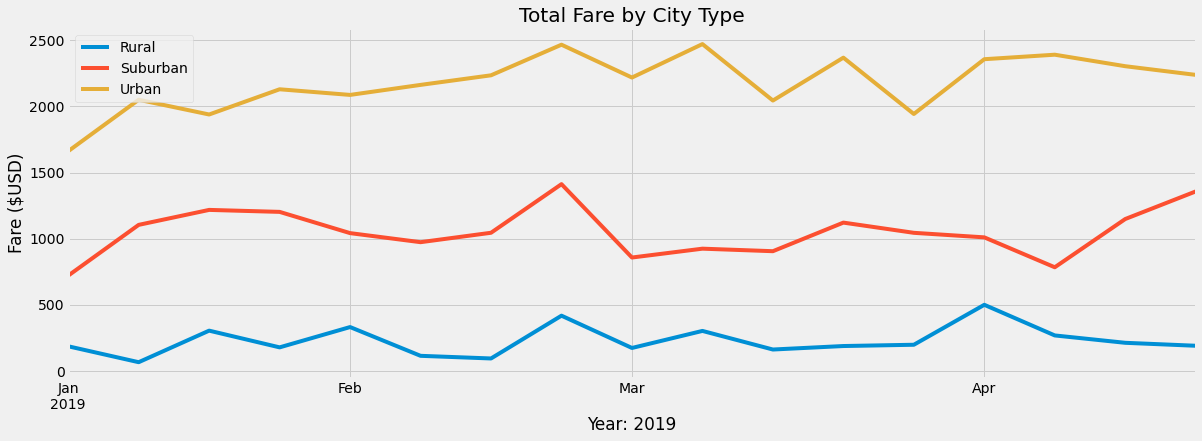

In [198]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

date_fare_loc_df.plot(figsize=(18,6))
plt.xlabel("Year: 2019")
plt.ylabel("Fare ($USD)")
plt.title("Total Fare by City Type")
plt.legend(loc="upper left")
plt.show()
